## SET 5
### Bahador Amjadi
### 2040470

In [1]:
library(ggplot2)
library(reshape2)
library(lubridate)
library(tibble)
library(dplyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'dplyr'

The following objects are masked from 'package:lubridate':

    intersect, setdiff, union

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
library("lattice")

### Exercise 1

In [2]:
mean.finder <- function(numbers, alpha, lambda){
    an.mean  <<- alpha/lambda;  an.var  <<- alpha/(lambda**2)  ; an.median  <<- 3.1
    num.mean <<- mean(numbers); num.var <<- var(numbers);        num.median <<- 3}

#a function that finds 95 credibility interval
cred.finder <- function(post.function){
    k <-0; integral <-1; interval <- 0.95
    while (integral > 0.95){k <- k + 0.01; integral <- integrate(post.function, k,8-k)$value}
    return (c(k, 1-k))}

post.func <- function(x){return(dgamma(x, shape = alpha.pos ,rate= lambda.pos))}

In [18]:
# a function that plots prior, posterior, likelihood at the same time
all.plotter <- function(numbers, prior, ylim){
    if (prior == 'Jeffrey'){               #jeffrey prior: alpha:0.5, lambda: 0 
        alpha.prior <<- 0.5; lambda.prior <<- 0
        alpha.pos  <<- sum(numbers)    + 0.5
        lambda.pos <<- length(numbers)}
    else if(prior == 'Uniform'){           #uniform prior: alpha:1, lambda: 0 
        alpha.prior <<- 1; lambda.prior <<- 0
        alpha.pos  <<- sum(numbers)    + 1
        lambda.pos <<- length(numbers)}  
    else {cat("unrecognized prior function!")}
        
    mean.finder(numbers, alpha.pos, lambda.pos)
#     a <<- cred.finder(post.func)
    
    p.post  <- dgamma(x=p,shape = alpha.pos ,rate= lambda.pos)
    plot(p, p.post , col="navyblue",lwd = 2.6, xlim=c(0,8),ylim = ylim,xlab="P", ylab="Density")
    abline(v=an.mean, col="red")
    abline(v=an.median, col="green")
#     abline(v=an.mean, col="red")
#     abline(v=an.median, col="green")
    
    legend(5,0.6,legend=c("Posterior", "Mean", "Median"), lty=1:2, cex=1.1,
           col=c("navyblue", "red", "green"), box.lty=0, text.font=4)
    title(main=paste(prior, "Prior and the Corresponding Posterior Dist"), line=0.7, cex.main=1.2)}

In [13]:
#fixing some global paramteres
p     <<- seq(from= 0,to=8,length.out = 100)
options(repr.plot.width=8, repr.plot.height =6)  #changing size of plots

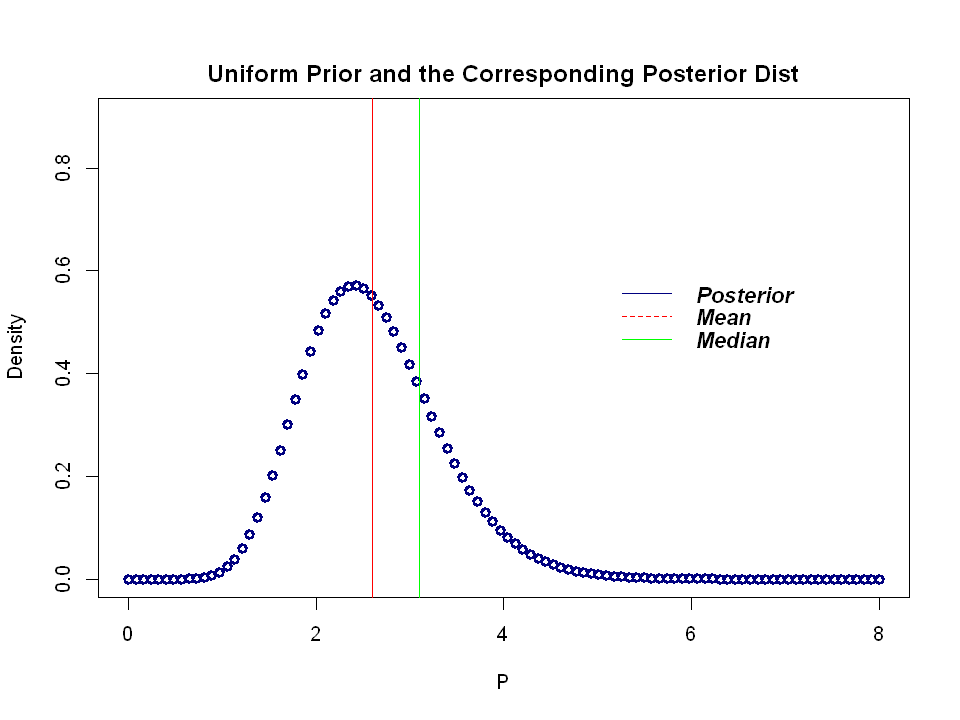

In [19]:
numbers <- c(4,1,3,1,3)
ylim <- c(0,0.9)  #setting the y axis range
#all.plotter(n,r, prior function, E[x], STD[x]), in case of unifrom dummy exp and std
all.plotter(numbers,'Uniform', ylim)

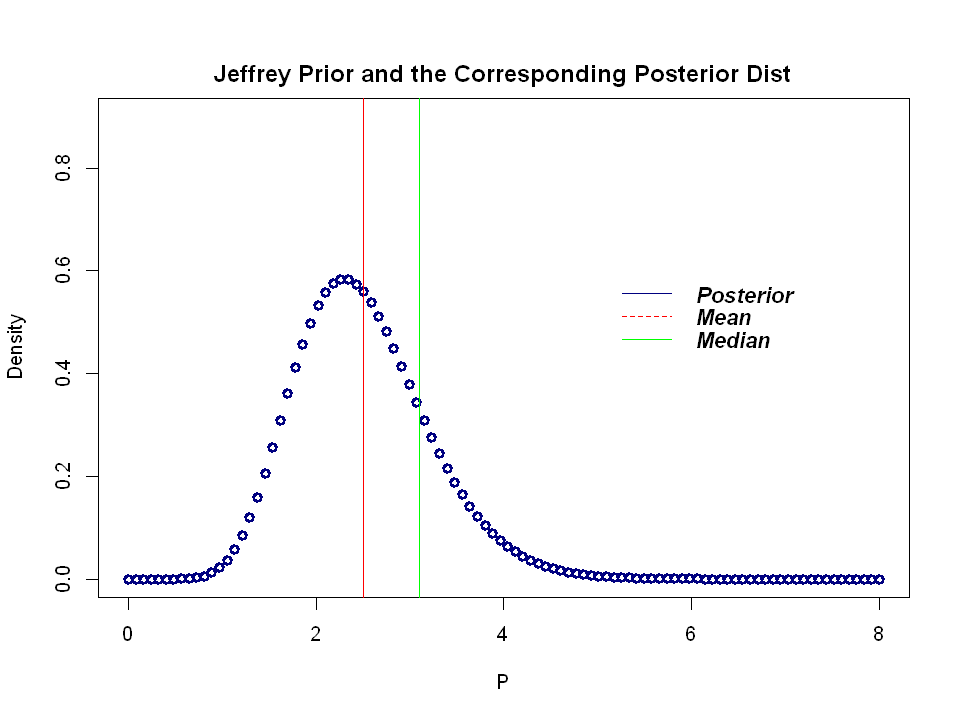

In [20]:
all.plotter(numbers,'Jeffrey', ylim)

ERROR: Error in qbeta(0.025, a_prior + r, b_prior + n - r): object 'a_prior' not found


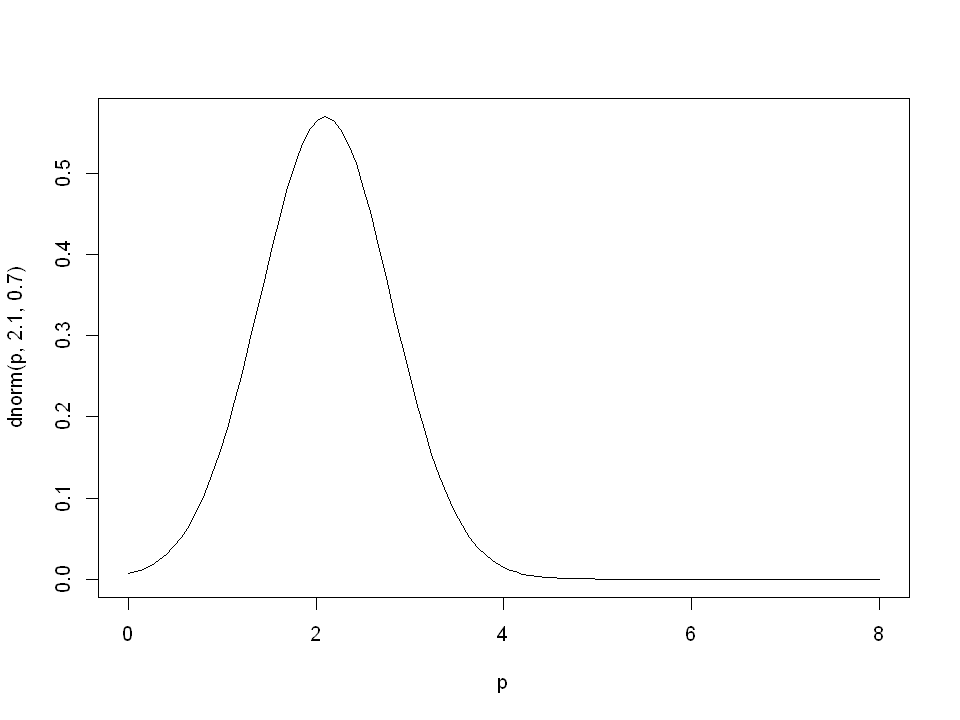

In [21]:
plot(p, dnorm(p,2.1, 0.7), , type = 'l')

p1_b <- qbeta(0.025, a_prior+r, b_prior+n-r)
mode_u <- p[which.max(post_u)]
cs_u <- cumsum(post_u)/n.sample
p1_u <- p[cs_u>=0.025][1]
p2_u <- p[cs_u>=0.975][1]

### Exercise 2

Enter data set dimension: 10
Alpha max:  1.44 
Alpha max:  1.44 
Alpha max:  1.44 
Alpha max:  1.44 
Alpha max:  1.44 
Alpha max:  1.5 
Alpha max:  1.56 
Alpha max:  1.56 
Alpha max:  1.56 
Alpha max:  1.62 
Alpha max:  1.62 
Alpha max:  1.68 


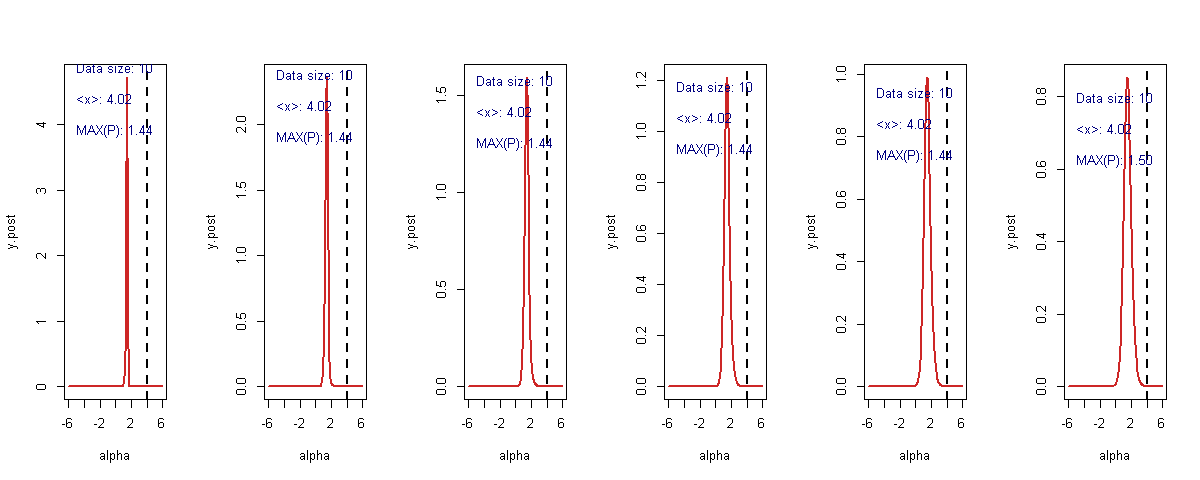

Alpha max:  1.68 
Alpha max:  1.68 
Alpha max:  1.74 
Alpha max:  1.74 
Alpha max:  1.74 
Alpha max:  1.74 


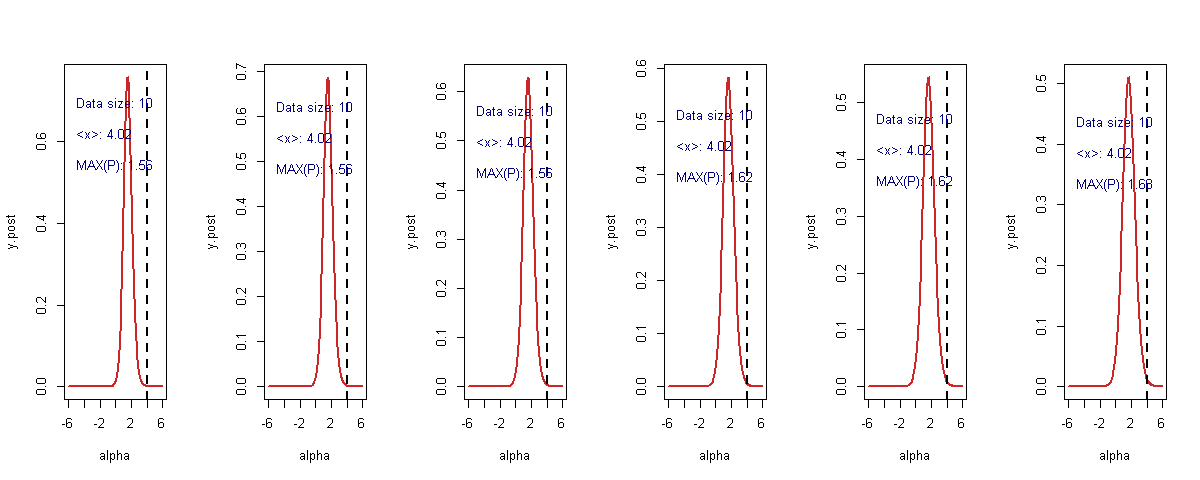

Alpha max:  1.8 
Alpha max:  1.8 
Alpha max:  1.8 
Alpha max:  1.8 
Alpha max:  1.86 
Alpha max:  1.86 


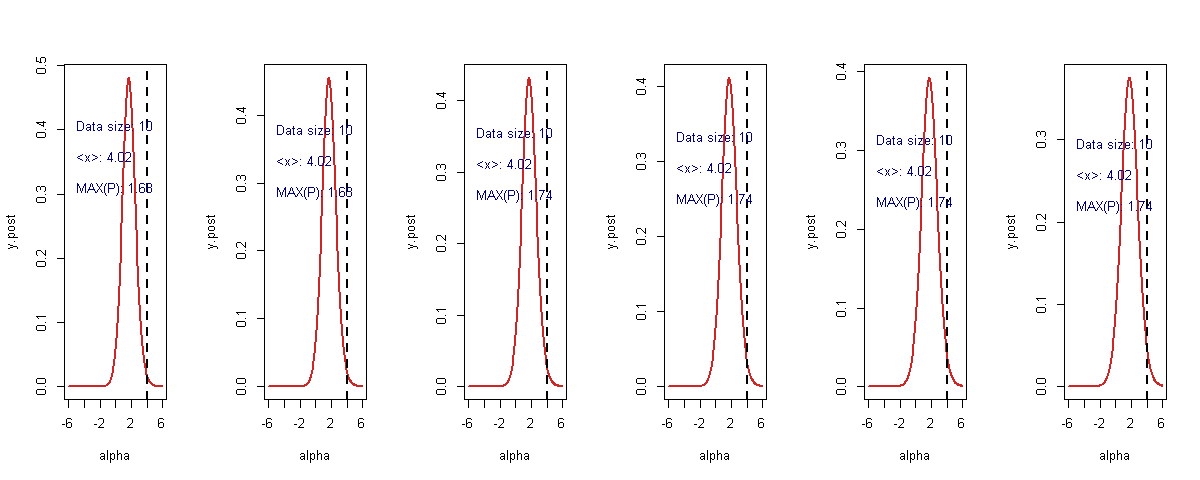

Alpha max:  1.86 
Alpha max:  1.86 
Alpha max:  1.92 
Alpha max:  1.92 
Alpha max:  1.92 
Alpha max:  1.92 


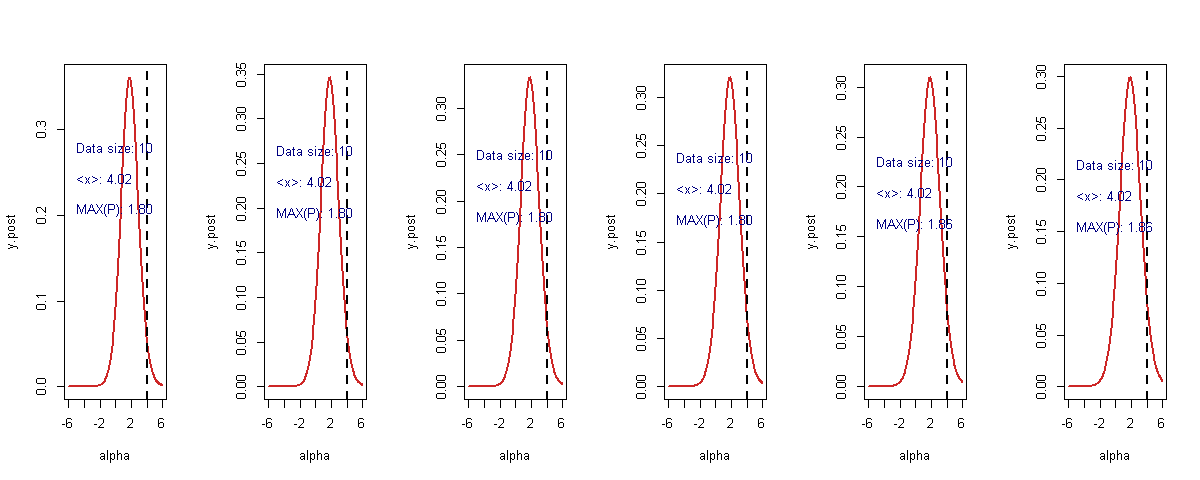

Alpha max:  1.98 
Alpha max:  1.98 
Alpha max:  1.98 
Alpha max:  1.98 
Alpha max:  2.04 
Alpha max:  2.04 


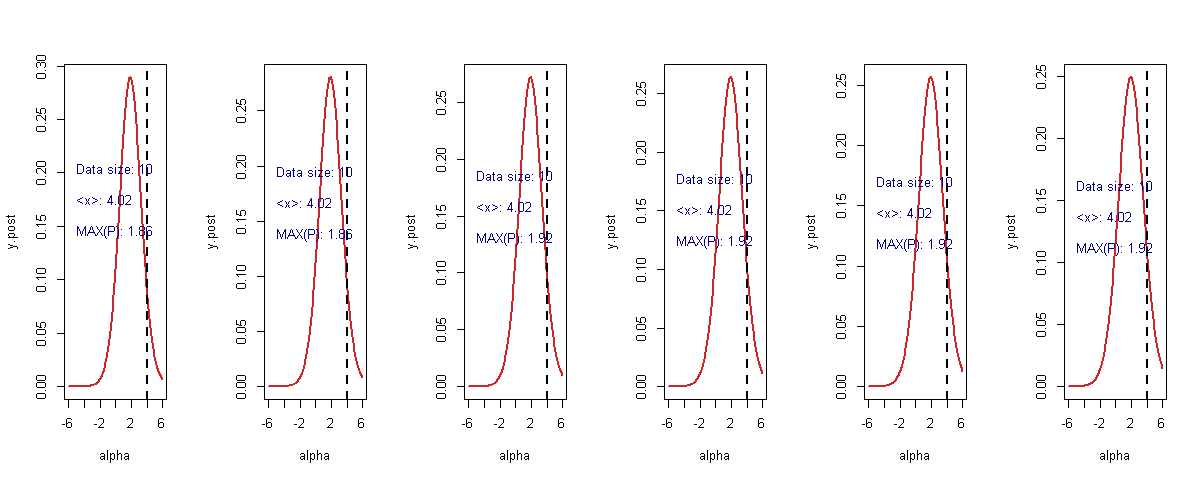

Alpha max:  2.04 
Alpha max:  2.04 
Alpha max:  2.1 
Alpha max:  2.1 
Alpha max:  2.1 
Alpha max:  2.1 


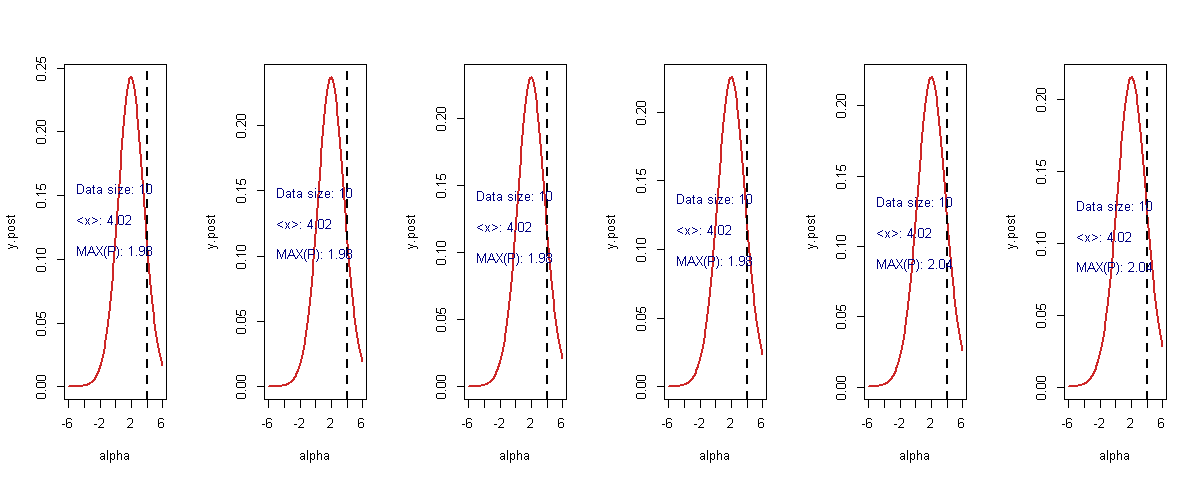

Alpha max:  2.1 
Alpha max:  2.16 
Alpha max:  2.16 
Alpha max:  2.16 
Alpha max:  2.16 
Alpha max:  2.22 


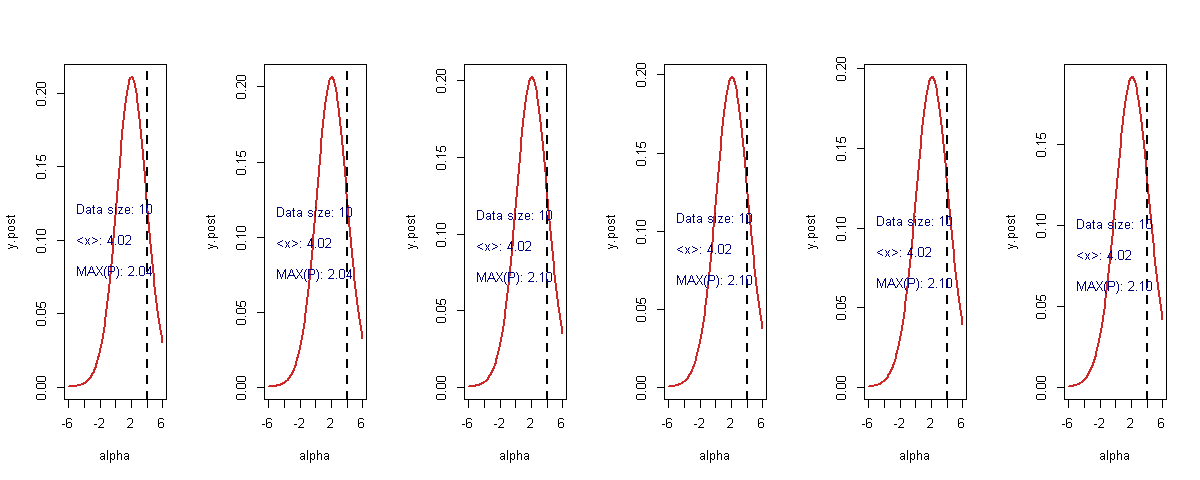

Alpha max:  2.22 
Alpha max:  2.22 


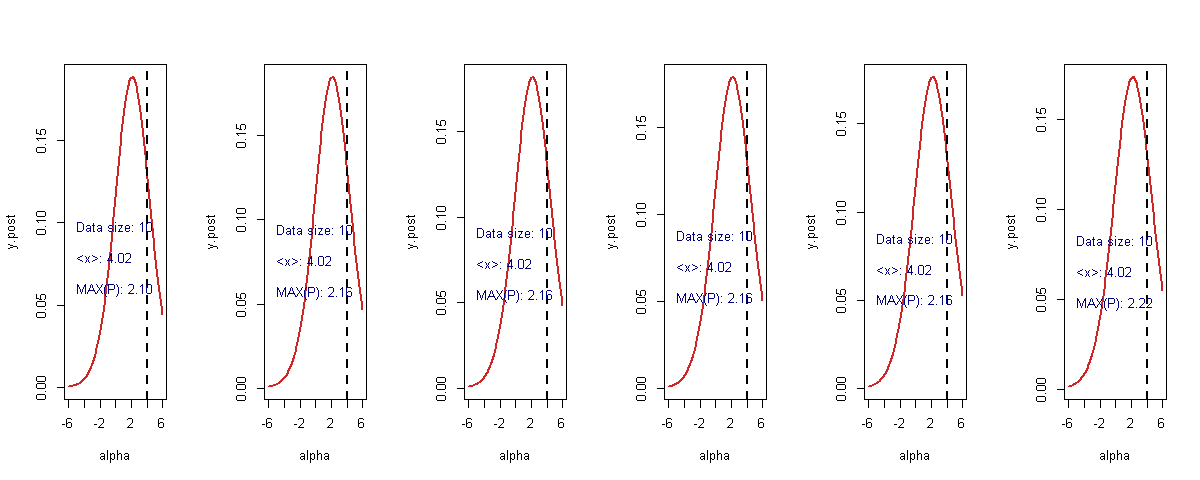

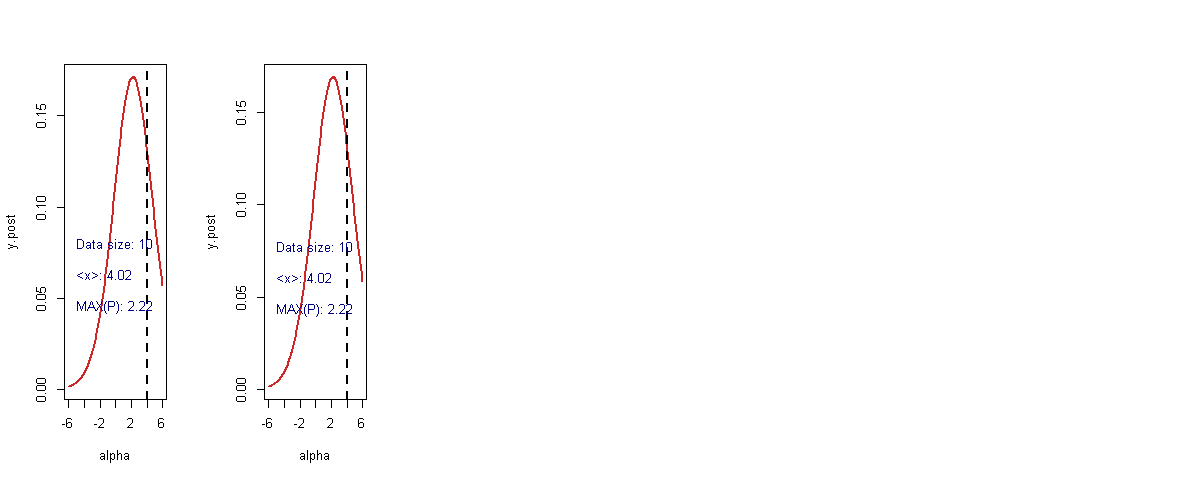

In [10]:
###### For the case in which both alpha and beta are unknown, we add a loop on beta to the former case of only unknown beta which
# was discussed in the lecture note. then we find the most probable value and the corresponding alpha and beta in a 2d matrix

options(repr.plot.width=10, repr.plot.height =4)  #changing size of plots
par(mfrow=c(1,6))

n.str    <- readline("Enter data set dimension: ")
n.plot   <- as.numeric(unlist(strsplit(n.str, ",")))
dt       <- data[1:n.plot]


p.log.like <- function(a, data){
    logL <- 0.0
    for (x in data) {logL <- logL - log(1 + ((x-a)/b)**2)}
return(logL)}

#for random sampling we choose random theata (since theta dist. is uniform), 
#according to x = beta * tan(theta) + alpha then calculate the corresponding x
theta    <- runif(1000, min = 0, max = pi)
data     <- 1 * tan(theta) + 1    #we assume the true alpha and beta are alpha=1 and beta=1

beta.list <- seq(from= 0.1,to=10, length.out=50)

all.log.star <- vector()
all.alpha    <- vector()

for (b in beta.list){
    
    n.sample <- 200
    x.min    <- -6; x.max <- +6
    h        <- (x.max - x.min)/n.sample
    alpha    <- seq(from=x.min, by=h, length.out=n.sample+1)

    # Get the LogLikelihood
    y.log.star <- p.log.like(alpha , dt)

    # - Find the maximum
    index.max    <- which.max(y.log.star)
    alpha.max    <- alpha [index.max]
    all.log.star <- append(all.log.star, max(y.log.star))
    all.alpha    <- append(all.alpha, alpha.max)
    
    cat(paste("Alpha max: ", alpha.max, "\n"))

    # - get the exponential and normalize the posterior
    y.post.star <- exp(y.log.star)
    y.post <- y.post.star/(h*sum(y.post.star))

    plot(alpha , y.post , type="l", lwd=2, col="firebrick3")
    dt.mean <- mean(dt)
    abline(v=dt.mean , lty=2, lwd=2)
    y.band <- (max(y.post) - min(y.post))*0.05
    text(-6, max(y.post)+y.band - 0.1 , col="navy", lwd = 2, pos=4,
    paste("Data size: ", n.plot , sep=""))
    text(-6, max(y.post)-y.band - 0.1 , col="navy", lwd = 2, pos=4,
    sprintf("<x>: %.2f", dt.mean))
    text(-6, max(y.post)-3*y.band - 0.1 , col="navy", lwd = 2, pos=4,
    sprintf("MAX(P): %.2f", alpha.max))    
}

index.max <- which.max(all.log.star)

prob.max  <- all.log.star[index.max]
alpha.max <- all.alpha   [index.max]
beta.max  <- beta.list   [index.max]

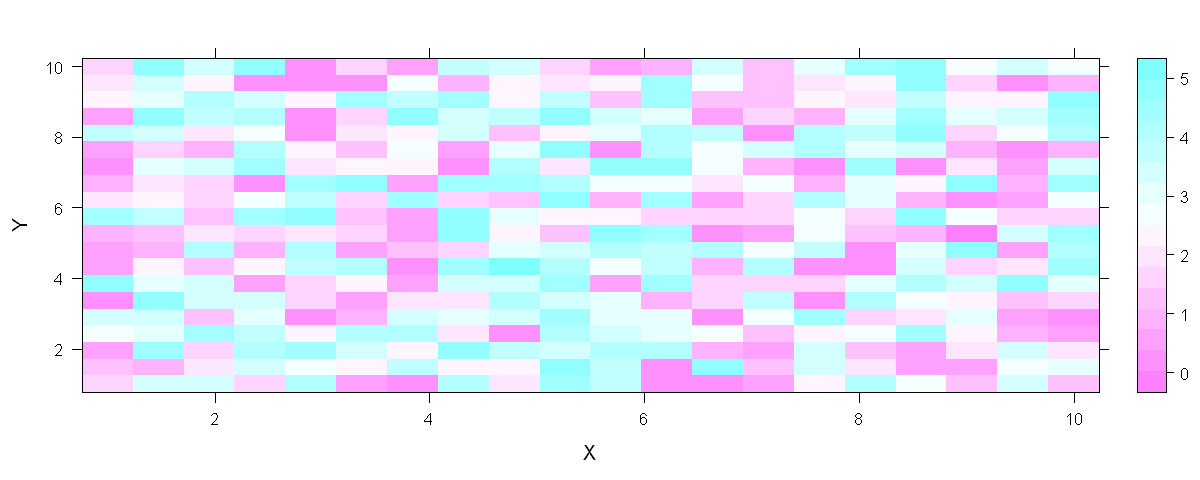

In [22]:
# Dummy data
x <- seq(1,10, length.out=20)
y <- seq(1,10, length.out=20)
data <- expand.grid(X=x, Y=y)
data$Z <- runif(400, 0, 5)

## Try it out
levelplot(Z ~ X*Y, data=data  ,xlab="X",
          main="")

### Exercise 3, Part A

In [172]:
signal <-     function(x, a, b, x0, w, t) {t * (a*exp(-(x-x0)**2/(2*w**2)) + b)}
#==================================================================================
log.post <-   function(d, x, a, b, x0, w, t) {
    if(a<0 || b <0) {return(-Inf)} # the effect of the prior
    sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))}
#==================================================================================
#a function that calculates z, given w, xdat, ddat and s.true
z.finder.w <-   function(w, A.true, B.true, x0, Delta.t, a, b){
    xdat <-   seq(from=-7, to=7, by=0.5*w)
    s.true <- signal(xdat , A.true , B.true , x0, w, Delta.t)
    ddat <- rpois(length(s.true), s.true)    
    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data=NA, nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
    for(k in 1:length(b)) {
    z[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, Delta.t)}}
    z <- z - max(z) }
#==================================================================================
#a function that finds a and b and sets the x,y limits
lim.finder <- function(alim, blim){
Nsamp <- 100
uniGrid <- seq(from=1/(2*Nsamp),
to=1-1/(2*Nsamp), by=1/Nsamp)
delta_a <<- diff(alim)/Nsamp
delta_b <<- diff(blim)/Nsamp
a <<- alim[1] + diff(alim)*uniGrid
b <<- blim[1] + diff(blim)*uniGrid }

In [176]:
x0      <- 0      # Signal peak
A.true  <- 2  # Signal amplitude
B.true  <- 1  # Background amplitude
Delta.t <- 5 # Exposure time
w.list  <- c(0.1,0.25,1,2,3)   #resolution different values

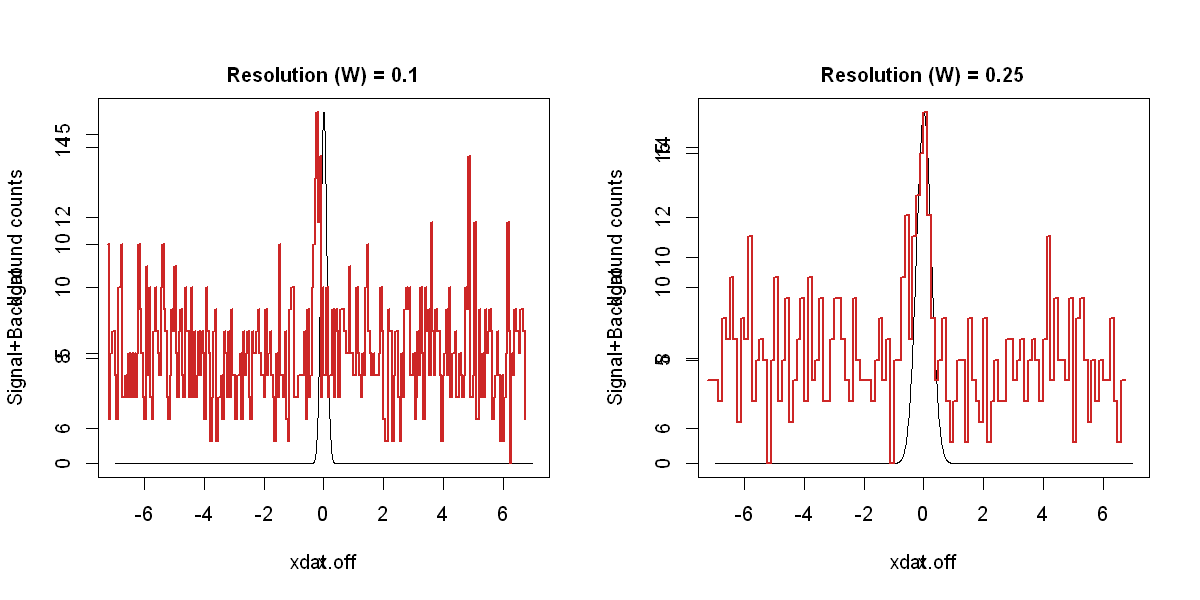

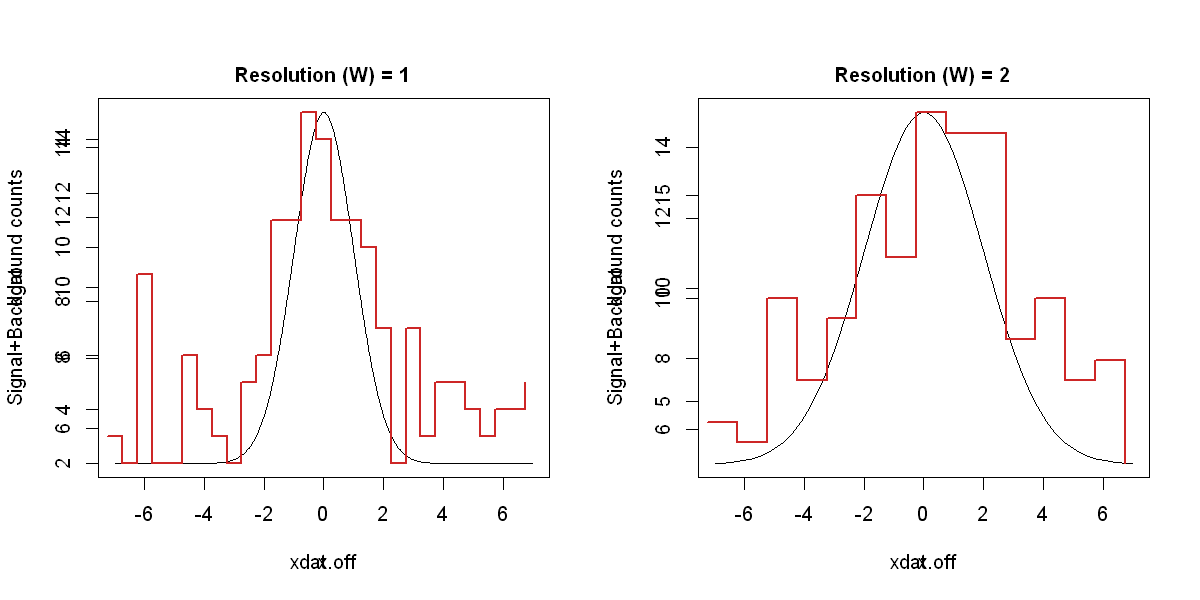

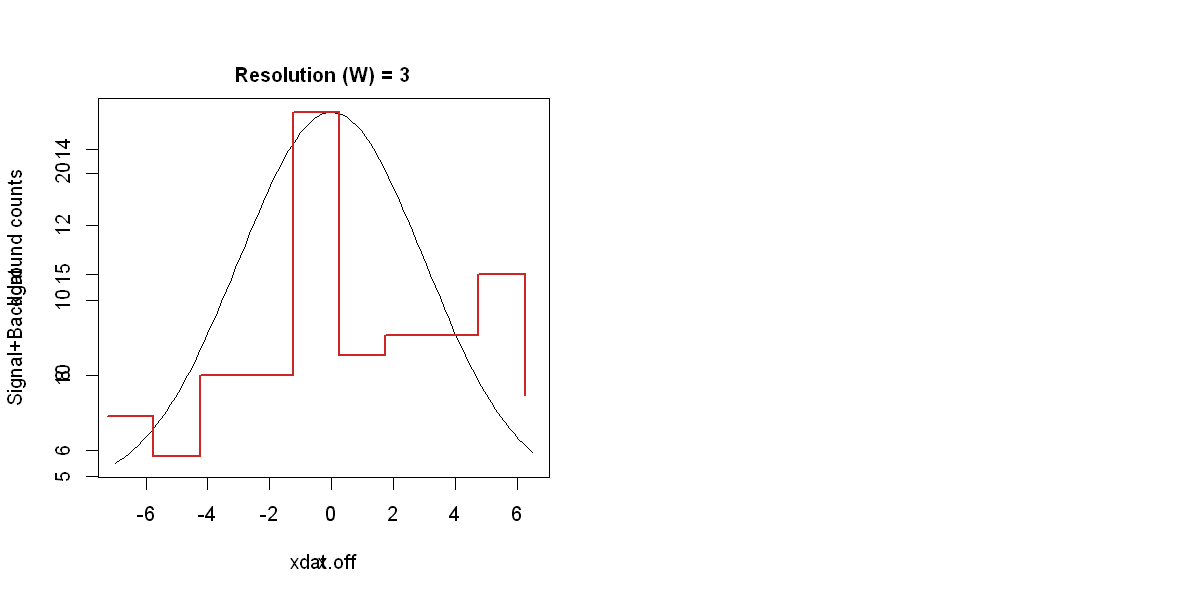

In [177]:
options(repr.plot.width=10, repr.plot.height =5)  #changing size of plots
par(mfrow=c(1,2))
set.seed(205)

for (w in w.list){
# - Generate the observed data
xdat <-   seq(from=-7, to=7, by=0.5*w)
s.true <- signal(xdat , A.true , B.true , x0, w, Delta.t)
ddat <- rpois(length(s.true), s.true)
xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
splot <- signal(xplot , A.true , B.true , x0, w, Delta.t)
plot(xplot , splot ,xlab="x", ylab="Signal+Background counts", type ='l')
par(new=TRUE)
xdat.off <- xdat -0.25
plot(xdat.off, ddat , type="s",col="firebrick3", lwd=2,xlim=range(xplot), ylim=range(c(splot , ddat)))
title(main=paste("Resolution (W) =", w), line=0.7, cex.main=1)}

In [178]:
alim <- c(0, 4)
blim <- c(0, 2.6)
lim.finder(alim, blim)   #this function finds a and b

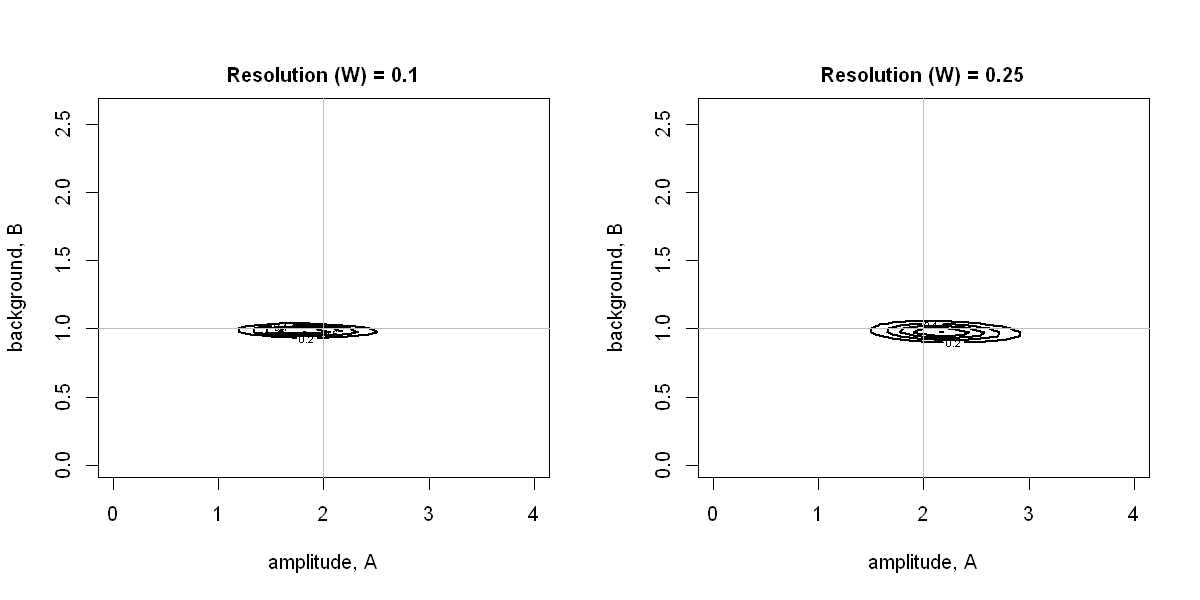

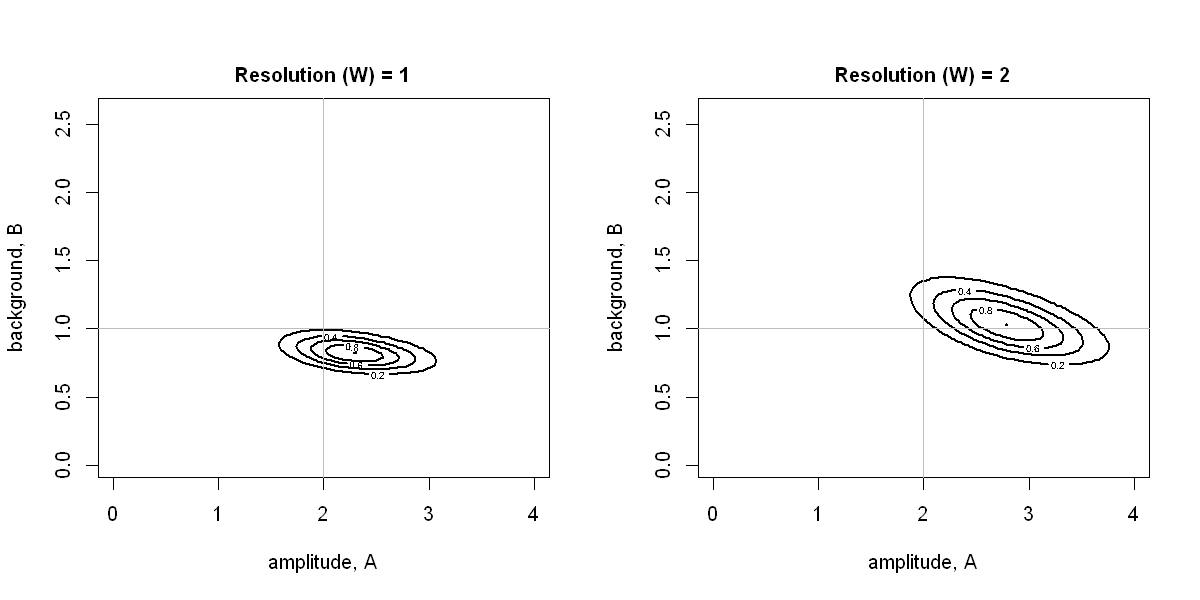

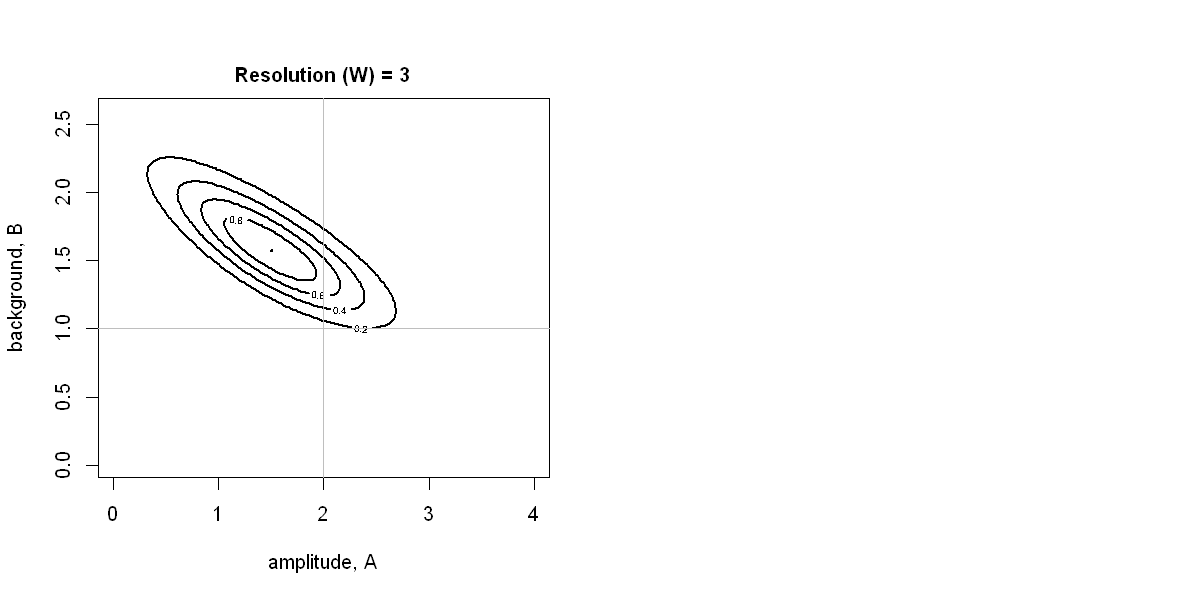

In [179]:
set.seed(205)
par(mfrow=c(1,2))
for (w in w.list){
z <- z.finder.w(w, A.true, B.true, x0, Delta.t, a, b)  
# Plot unnormalized 2D posterior as contours.
contour(a, b, exp(z),nlevels = 5,labcex = 0.5,lwd = 2,xlab="amplitude, A",ylab="background, B")
abline(v=2,h=1,col="grey")
title(main=paste("Resolution (W) =", w), line=0.7, cex.main=1)}

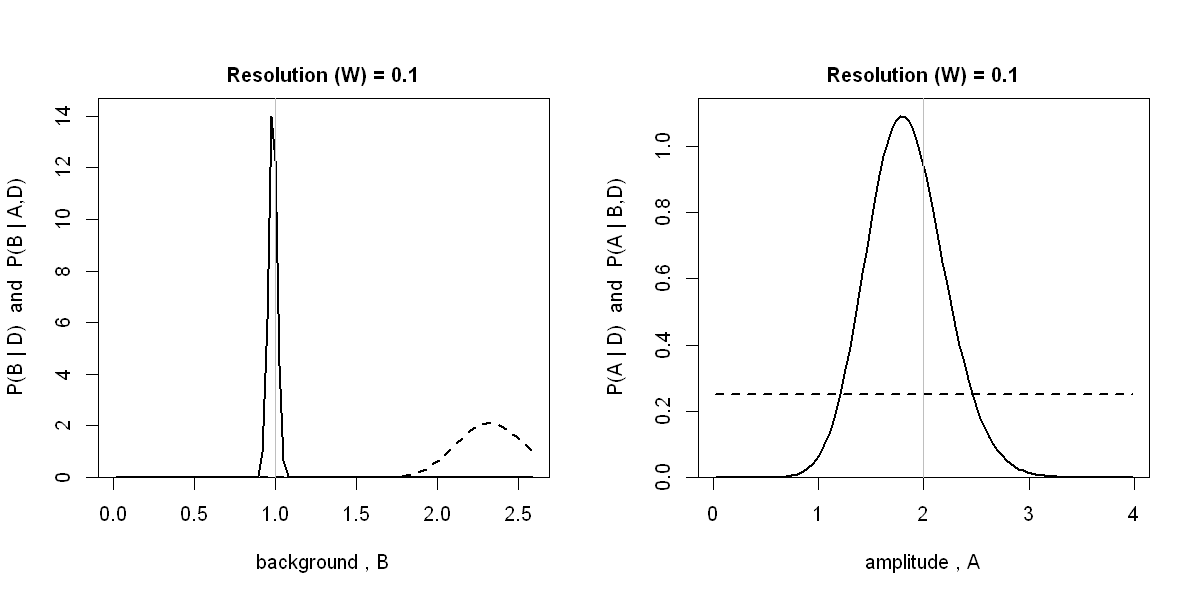

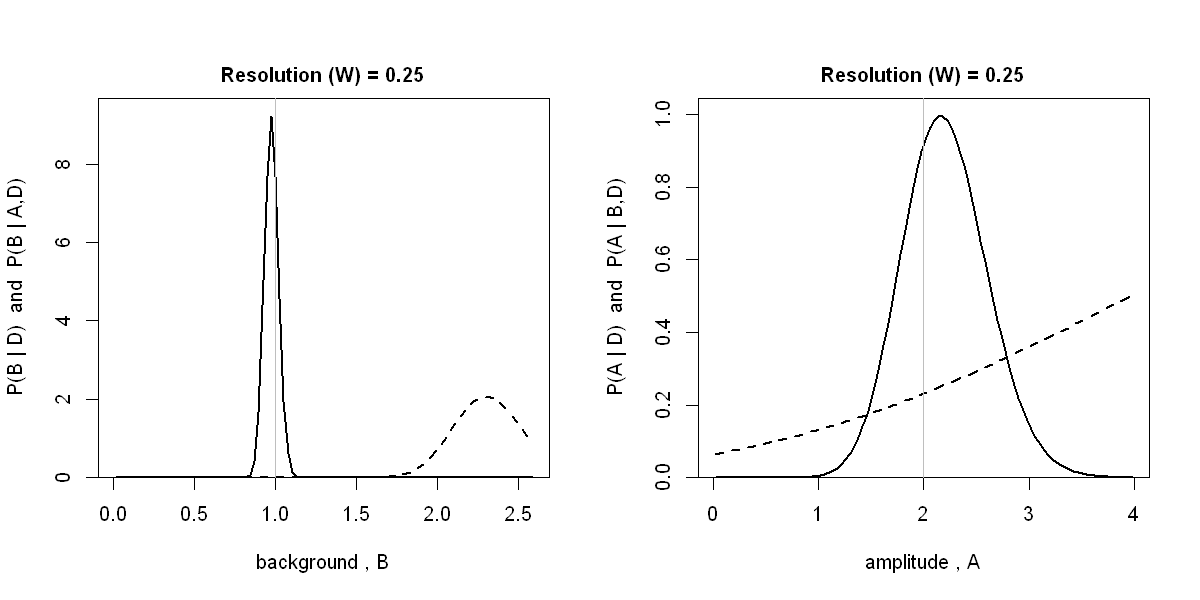

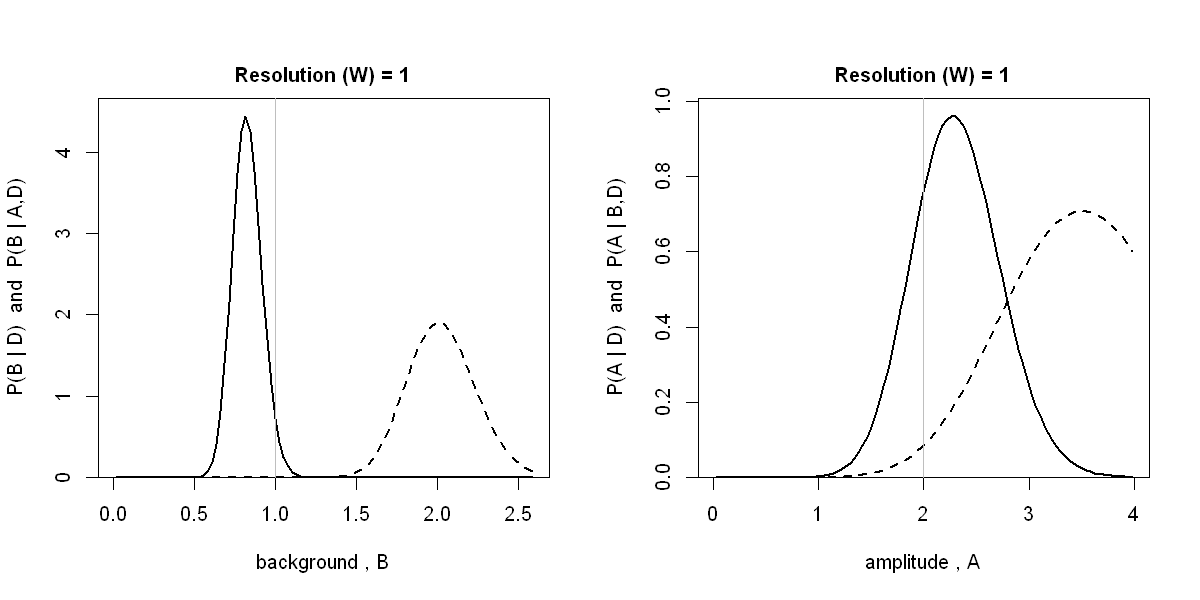

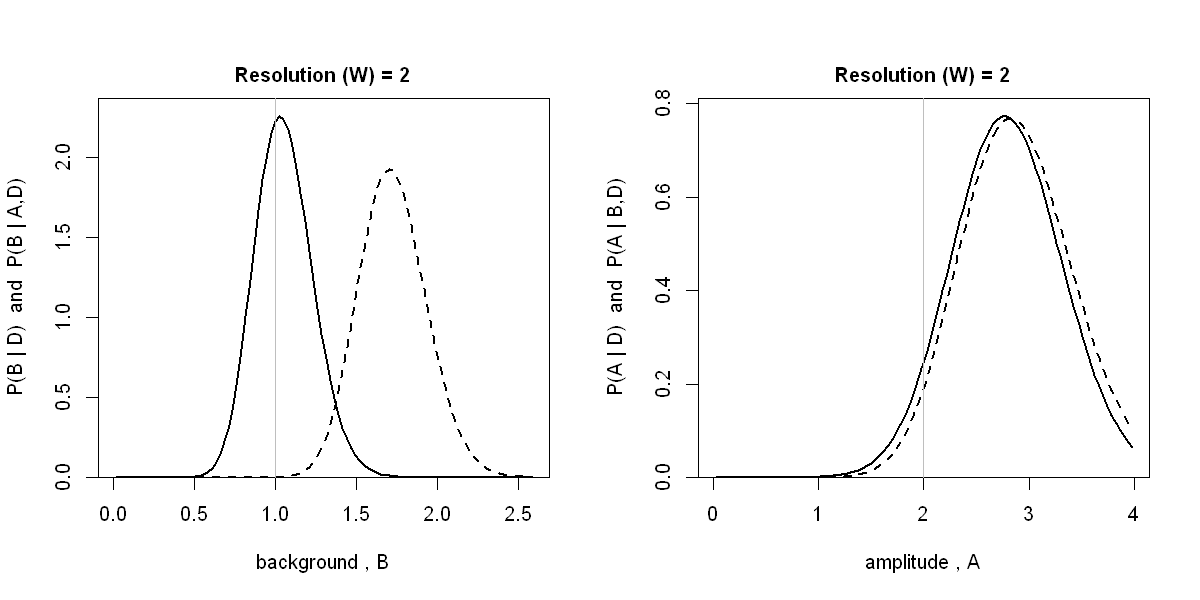

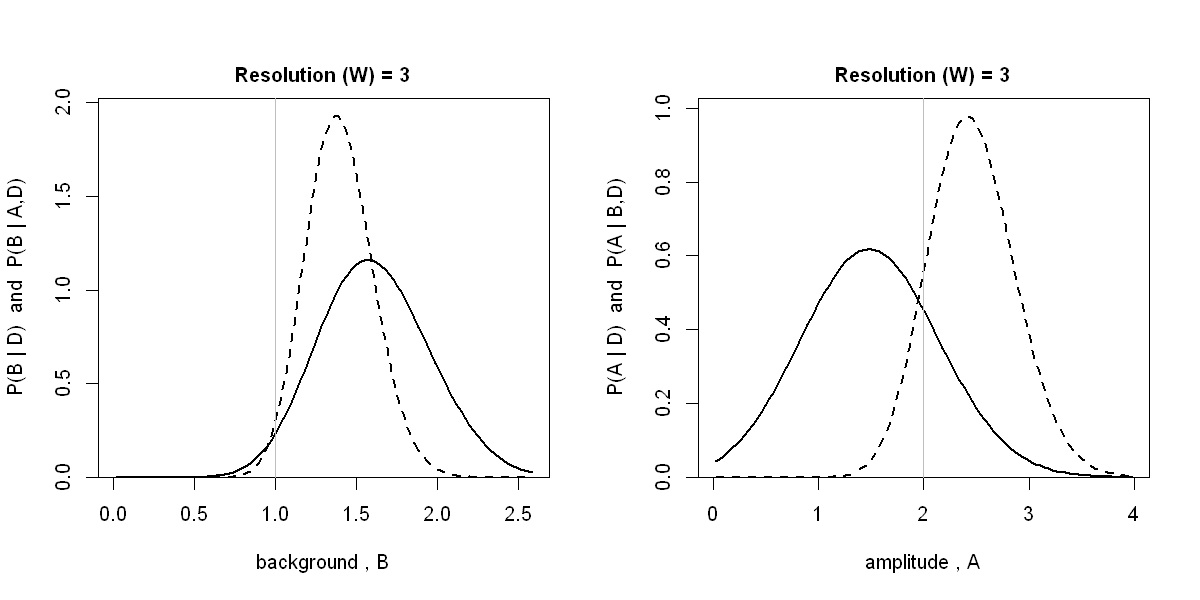

In [180]:
set.seed(205)
par(mfrow=c(1,2))
for (w in w.list){
z <- z.finder.w(w, A.true, B.true, x0, Delta.t, a, b)
    
# Compute normalized marginalized posteriors , P(a|D) and P(b|D)
# by summing over other parameter. Normalize by gridding.
p_a_D <- apply(exp(z), 1, sum)
p_a_D <- p_a_D/(delta_a*sum(p_a_D))
p_b_D <- apply(exp(z), 2, sum)
p_b_D <- p_b_D/(delta_b*sum(p_b_D))
# Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
# using true values of conditioned parameters. Vectorize(func , par)
# makes a vectorized function out of func in the parameter par.
p_a_bD <- exp(Vectorize(log.post , "a")(ddat , xdat , a, B.true ,
x0, w, Delta.t))
p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
p_b_aD <- exp(Vectorize(log.post , "b")(ddat , xdat , A.true , b,
x0, w, Delta.t))
p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))
    
# par(mfrow=c(2,2), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
# Plot the 1D marginalized posteriors
plot(b, p_b_D, xlab="background , B", yaxs="i",
ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B | D)  and  P(B | A,D)",
type="l", lwd=2)
title(main=paste("Resolution (W) =", w), line=0.7, cex.main=1)
lines(b, p_b_aD, lwd=2, lty=2)
abline(v=B.true , col="grey")
plot(a, p_a_D, xlab="amplitude , A", yaxs="i",
ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A | D)  and  P(A | B,D)",
type="l", lwd=2)
lines(a, p_a_bD, lwd=2, lty=2)
abline(v=A.true , col="grey")
title(main=paste("Resolution (W) =", w), line=0.7, cex.main=1)}

In [181]:
set.seed(205)
for (w in c(0.1,0.25,1,2,3)){
z <- z.finder.w(w, A.true, B.true, x0, Delta.t, a, b)  
    
# Compute normalized marginalized posteriors , P(a|D) and P(b|D)
# by summing over other parameter. Normalize by gridding.
p_a_D <- apply(exp(z), 1, sum)
p_a_D <- p_a_D/(delta_a*sum(p_a_D))
p_b_D <- apply(exp(z), 2, sum)
p_b_D <- p_b_D/(delta_b*sum(p_b_D))
# Compute mean , standard deviation , covariance , correlation , of A and B
mean_a <- delta_a * sum(a * p_a_D)
mean_b <- delta_b * sum(b * p_b_D)
sd_a <- sqrt( delta_a * sum((a-mean_a)**2 * p_a_D) )
sd_b <- sqrt( delta_b * sum((b-mean_b)**2 * p_b_D) )
# Covariance nurmalization is performed with ’brute force ’
# The normalization constant is Z = delta_a*delta_b*sum(exp(z)).
# This is independent of (a,b) so can be calculated outside of the loops.
cov_ab <- 0
for(j in 1:length(a)) {
for(k in 1:length(b)) {
cov_ab <- cov_ab + (a[j]-mean_a)*(b[k]-mean_b)*exp(z[j,k])}}
    
cov_ab <- cov_ab / sum(exp(z))
rho_ab <- cov_ab / (sd_a * sd_b)
cat("The resolution (w):", w,"\n")
cat("  a = ", mean_a, "+/-", sd_a, "\n")
cat("  b = ", mean_b, "+/-", sd_b, "\n")
cat("rho = ", rho_ab, "\n","\n")}

The resolution (w): 0.1 
  a =  1.83596 +/- 0.3674777 
  b =  0.9850387 +/- 0.02684706 
rho =  -0.1117512 
 
The resolution (w): 0.25 
  a =  2.201094 +/- 0.4019566 
  b =  0.9766824 +/- 0.04329026 
rho =  -0.1882773 
 
The resolution (w): 1 
  a =  2.312475 +/- 0.4167116 
  b =  0.8278004 +/- 0.09028635 
rho =  -0.3751633 
 
The resolution (w): 2 
  a =  2.776647 +/- 0.5015319 
  b =  1.055619 +/- 0.1781988 
rho =  -0.5698751 
 
The resolution (w): 3 
  a =  1.513588 +/- 0.6313239 
  b =  1.608978 +/- 0.3366032 
rho =  -0.7809911 
 


### Exercise 3, Part B

In [196]:
#a function that calculates z, given ratio, ddat and s.true
z.finder.ratio <-   function(ratio, A.true, x0, Delta.t, a, b){
    B.true <- A.true /ratio
    s.true <- signal(xdat , A.true , B.true , x0, w, Delta.t)
    ddat <- rpois(length(s.true), s.true)
    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data=NA, nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
    for(k in 1:length(b)) {
    z[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, Delta.t)}}
    z <- z - max(z) }

In [190]:
x0         <- 0             # Signal peak
w          <- 1
A.true     <- 1             # Signal amplitud
Delta.t    <- 5             # Exposure time
ratio.list <- c(1,2,10,50)  #ratio = A.true/B.true

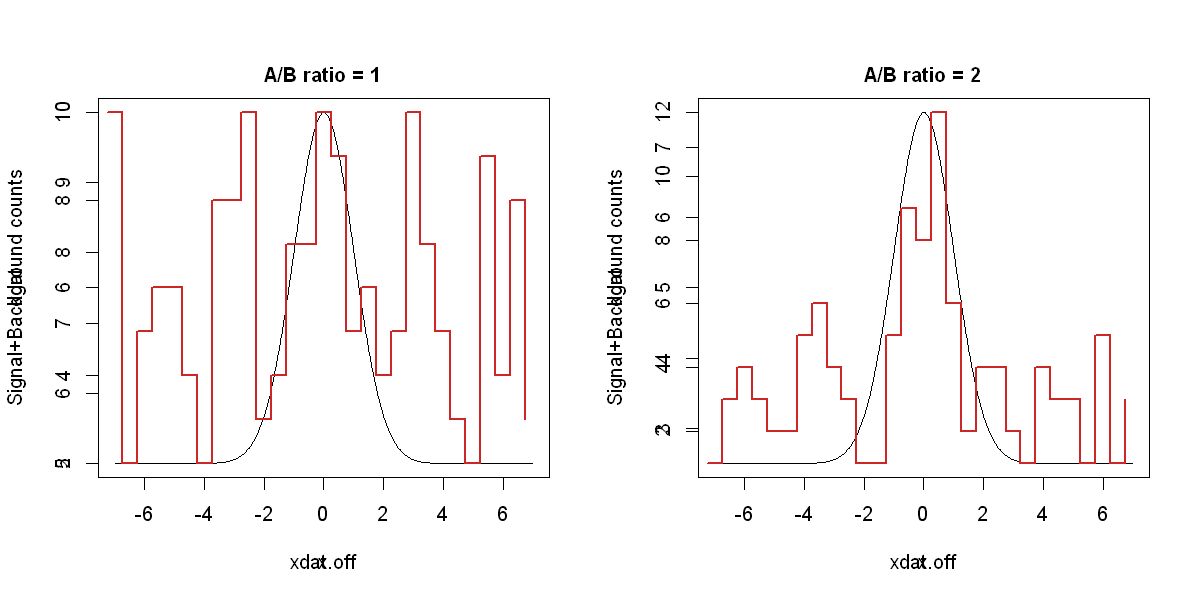

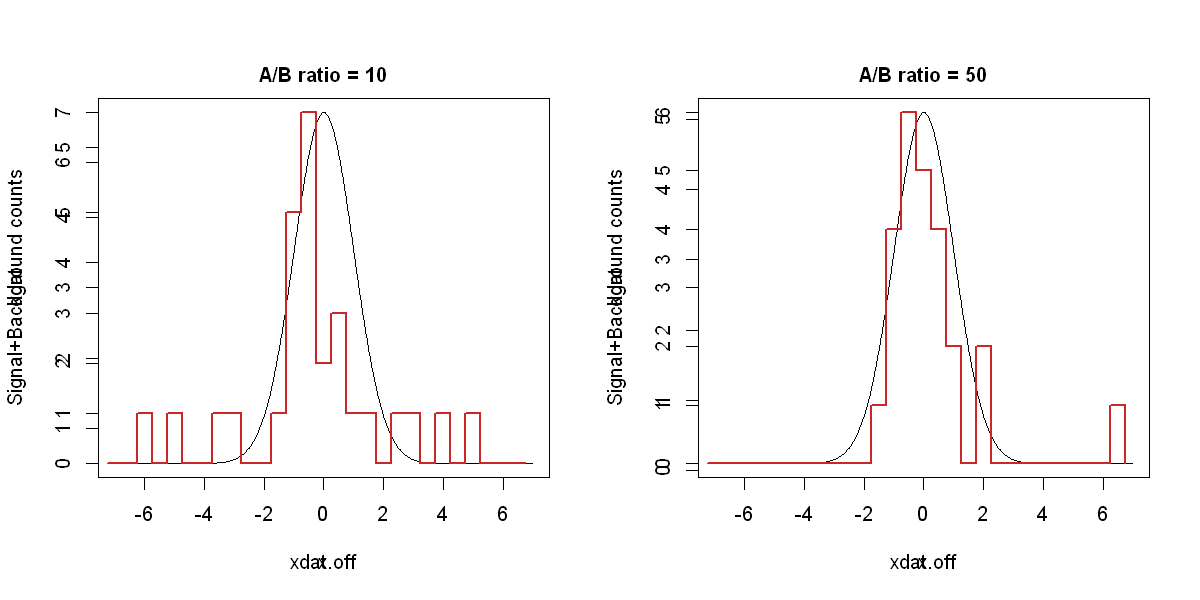

In [191]:
par(mfrow=c(1,2))
set.seed(205)

for (ratio in ratio.list){
B.true <- A.true /ratio
# - Generate the observed data
xdat <-   seq(from=-7*w, to=7*w, by=0.5*w)
s.true <- signal(xdat , A.true , B.true , x0, w, Delta.t)
ddat <- rpois(length(s.true), s.true)
xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
splot <- signal(xplot , A.true , B.true , x0, w, Delta.t)
plot(xplot , splot ,xlab="x", ylab="Signal+Background counts", type ='l')
par(new=TRUE)
xdat.off <- xdat -0.25
plot(xdat.off, ddat , type="s",col="firebrick3", lwd=2,xlim=range(xplot), ylim=range(c(splot , ddat)))
title(main=paste("A/B ratio =", ratio), line=0.7, cex.main=1) }

In [192]:
alim <- c(0, 4)
blim <- c(0, 2.6)
lim.finder(alim, blim) #this function finds a and b

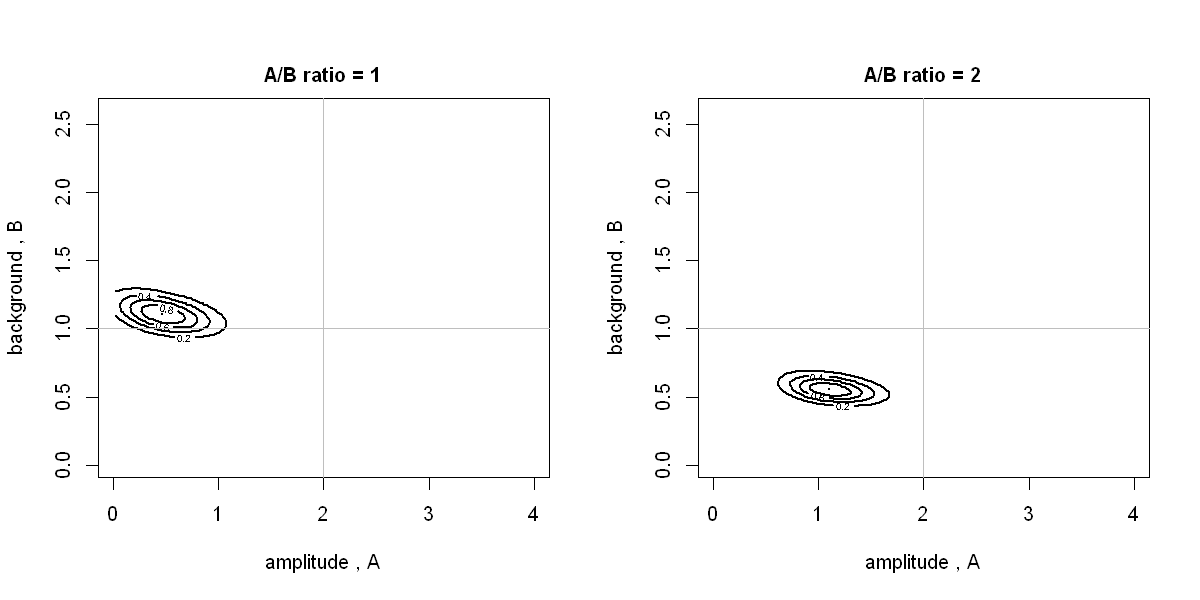

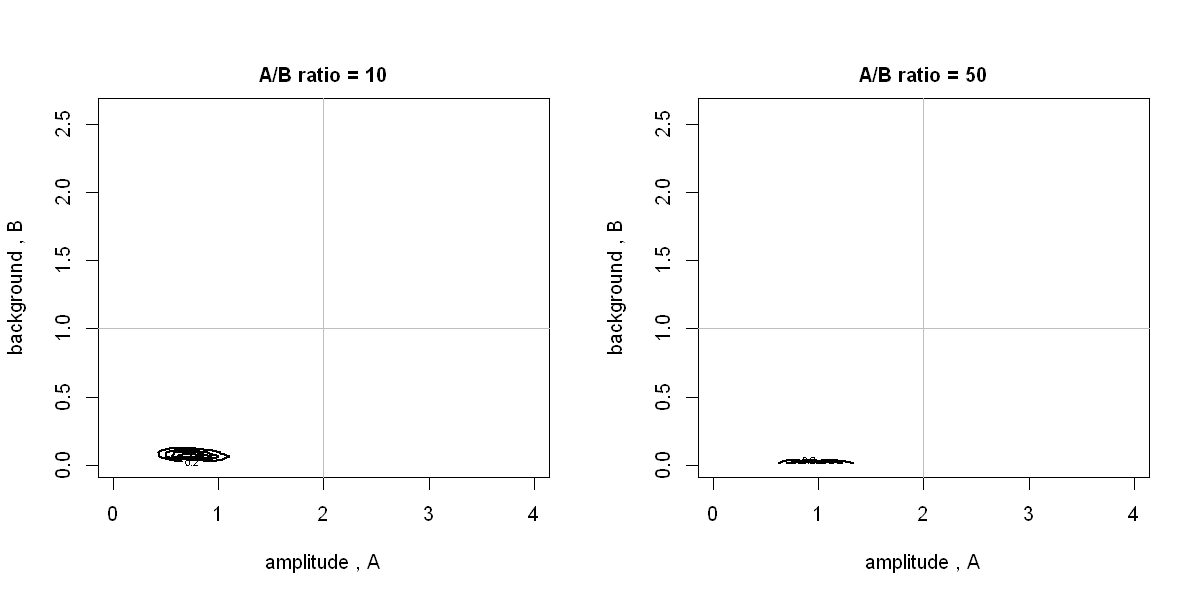

In [197]:
par(mfrow=c(1,2))
set.seed(205)
for (ratio in ratio.list){
z <- z.finder.ratio(ratio,A.true, x0, Delta.t, a, b)
# Plot unnormalized 2D posterior as contours.
contour(a, b, exp(z),nlevels = 5,labcex = 0.5,lwd = 2,xlab="amplitude , A",ylab="background , B")
abline(v=2,h=1,col="grey")
title(main=paste("A/B ratio =", ratio), line=0.7, cex.main=1) }

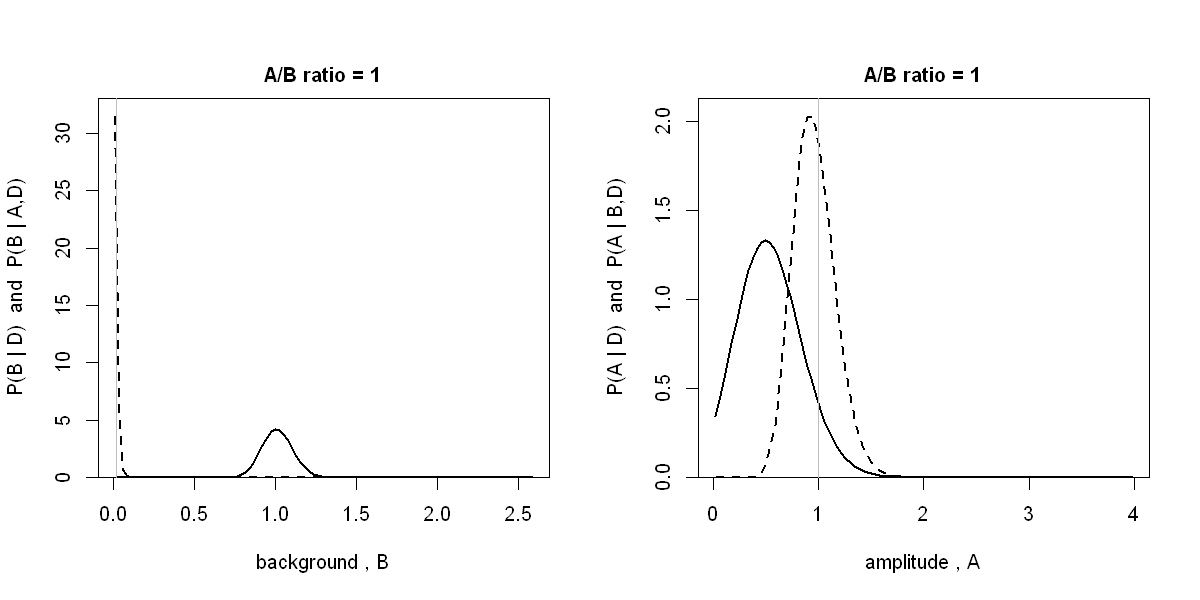

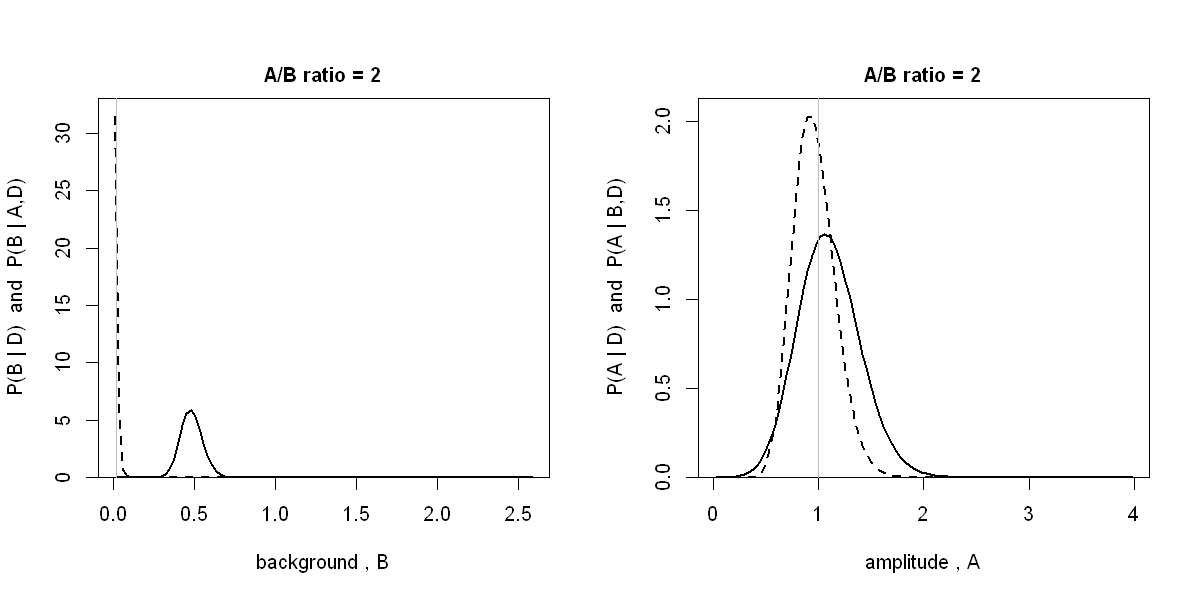

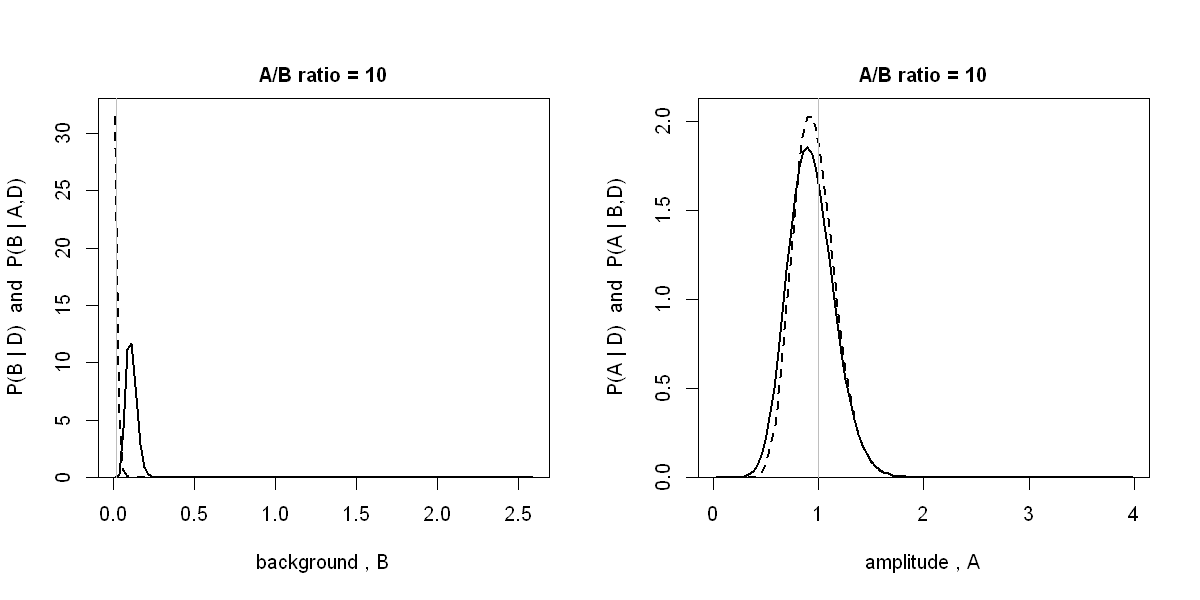

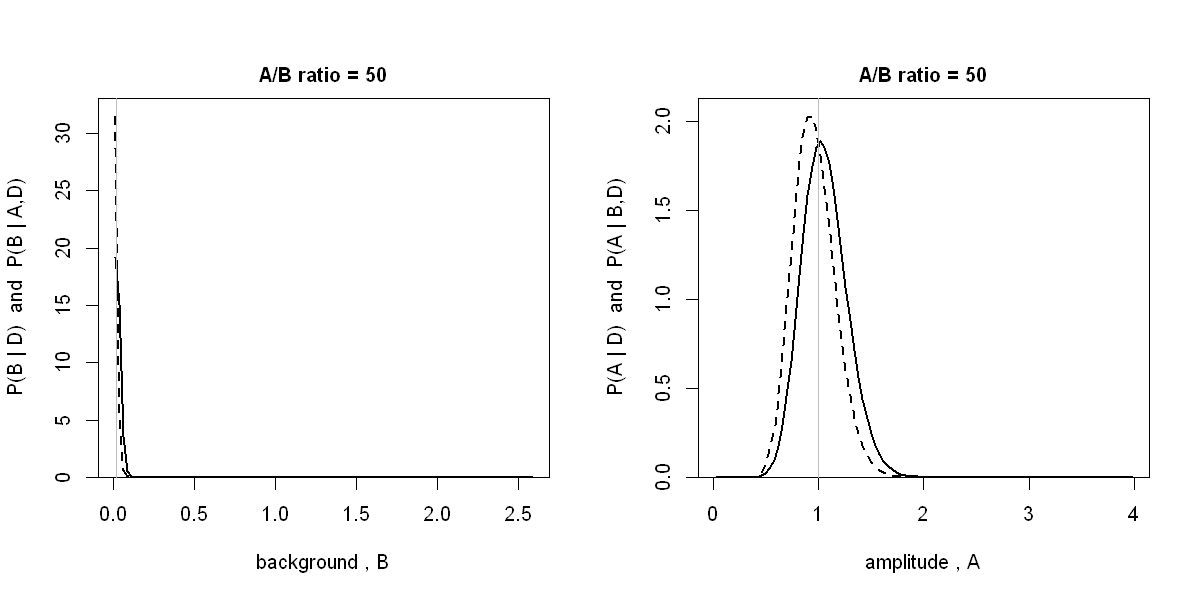

In [198]:
par(mfrow=c(1,2))
for (ratio in ratio.list){
z <- z.finder.ratio(ratio,A.true, x0, Delta.t, a, b)        
# Compute normalized marginalized posteriors , P(a|D) and P(b|D)
# by summing over other parameter. Normalize by gridding.
p_a_D <- apply(exp(z), 1, sum)
p_a_D <- p_a_D/(delta_a*sum(p_a_D))
p_b_D <- apply(exp(z), 2, sum)
p_b_D <- p_b_D/(delta_b*sum(p_b_D))
# Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
# using true values of conditioned parameters. Vectorize(func , par)
# makes a vectorized function out of func in the parameter par.
p_a_bD <- exp(Vectorize(log.post , "a")(ddat , xdat , a, B.true ,
x0, w, Delta.t))
p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
p_b_aD <- exp(Vectorize(log.post , "b")(ddat , xdat , A.true , b,
x0, w, Delta.t))
p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))
    
# par(mfrow=c(2,2), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
# Plot the 1D marginalized posteriors
plot(b, p_b_D, xlab="background , B", yaxs="i",
ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B | D)  and  P(B | A,D)",
type="l", lwd=2)
title(main=paste("A/B ratio =", ratio), line=0.7, cex.main=1)   

lines(b, p_b_aD, lwd=2, lty=2)
abline(v=B.true , col="grey")
plot(a, p_a_D, xlab="amplitude , A", yaxs="i",
ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A | D)  and  P(A | B,D)",
type="l", lwd=2)
lines(a, p_a_bD, lwd=2, lty=2)
abline(v=A.true , col="grey")
title(main=paste("A/B ratio =", ratio), line=0.7, cex.main=1)   }

In [200]:
for (ratio in ratio.list){
z <- z.finder.ratio(ratio, A.true, x0, Delta.t, a, b)
# Compute normalized marginalized posteriors , P(a|D) and P(b|D)
# by summing over other parameter. Normalize by gridding.
p_a_D <- apply(exp(z), 1, sum)
p_a_D <- p_a_D/(delta_a*sum(p_a_D))
p_b_D <- apply(exp(z), 2, sum)
p_b_D <- p_b_D/(delta_b*sum(p_b_D))
# Compute mean , standard deviation , covariance , correlation , of A and B
mean_a <- delta_a * sum(a * p_a_D)
mean_b <- delta_b * sum(b * p_b_D)
sd_a <- sqrt( delta_a * sum((a-mean_a)**2 * p_a_D) )
sd_b <- sqrt( delta_b * sum((b-mean_b)**2 * p_b_D) )
# Covariance nurmalization is performed with ’brute force ’
# The normalization constant is Z = delta_a*delta_b*sum(exp(z)).
# This is independent of (a,b) so can be calculated outside of the loops.
cov_ab <- 0
for(j in 1:length(a)) {
for(k in 1:length(b)) {
cov_ab <- cov_ab + (a[j]-mean_a)*(b[k]-mean_b)*exp(z[j,k])}}
    
cov_ab <- cov_ab / sum(exp(z))
rho_ab <- cov_ab / (sd_a * sd_b)
cat("The A/B ratio:", ratio,"\n")
cat("  a = ", mean_a, "+/-", sd_a, "\n")
cat("  b = ", mean_b, "+/-", sd_b, "\n")
cat("rho = ", rho_ab, "\n","\n")}

The A/B ratio: 1 
  a =  1.050922 +/- 0.3331297 
  b =  0.7562572 +/- 0.08531741 
rho =  -0.4199826 
 
The A/B ratio: 2 
  a =  1.106536 +/- 0.3032181 
  b =  0.4983673 +/- 0.06975237 
rho =  -0.3906671 
 
The A/B ratio: 10 
  a =  0.8546148 +/- 0.1940772 
  b =  0.04569691 +/- 0.02059944 
rho =  -0.1556715 
 
The A/B ratio: 50 
  a =  0.8287594 +/- 0.1893467 
  b =  0.02127871 +/- 0.01482163 
rho =  -0.1645644 
 
